In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm
%matplotlib inline
import plotting_tools as pt
from scipy import linalg

from sklearn.mixture import GMM


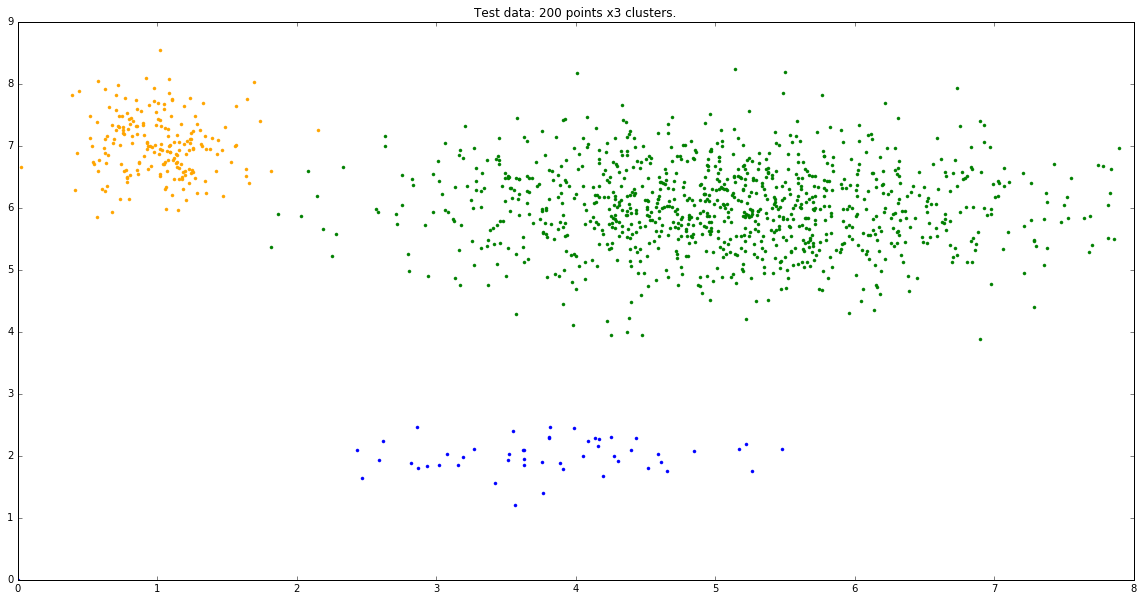

In [11]:
#------------------------------------------------------------
# data

colors = ['b','orange','g','r','c','m','y','k','Brown','ForestGreen']

# define cluster 
centers = [[4,2],[1,7],[5,6]]

# cluster sigmas
sigmas = [[0.8,0.3],[0.3,0.5],[1.1,0.7]]

# data point in each set
data_points =[[50],[200],[1000]]

# Generate test data
np.random.seed(42) 
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma), points) in enumerate(zip(centers, sigmas, data_points)):
    xpts = np.hstack((xpts, np.random.standard_normal(points) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(points) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(points) * i))
    
# Visualize the test data
fig0, ax0 = plt.subplots(figsize=(20,10))
for label in range(len(centers)):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
        color=colors[label])
    
ax0.set_title('Test data: 200 points x3 clusters.')

In [12]:
all_data = np.vstack((xpts, ypts)).T
all_data.shape

(1251, 2)

In [13]:
gmm = GMM(3,params='wmc')
gmm.fit(all_data)
log_dens = gmm.score(all_data)
BIC = gmm.bic(all_data)

In [14]:
for i in range(gmm.n_components):
        print('Mean',gmm.means_[i])
        print('Covar',gmm.covars_[i])

Mean [ 5.07152611  6.0092694 ]
Covar [ 1.21309198  0.46420084]
Mean [ 1.00604693  7.01299051]
Covar [ 0.08765437  0.24046522]
Mean [ 3.7447262   1.96601476]
Covar [ 0.81749272  0.14440876]


/home/calum/anaconda3/lib/python3.5/site-packages/matplotlib/transforms.py:1965: ComplexWarning: Casting complex values to real discards the imaginary part
  np.float_)


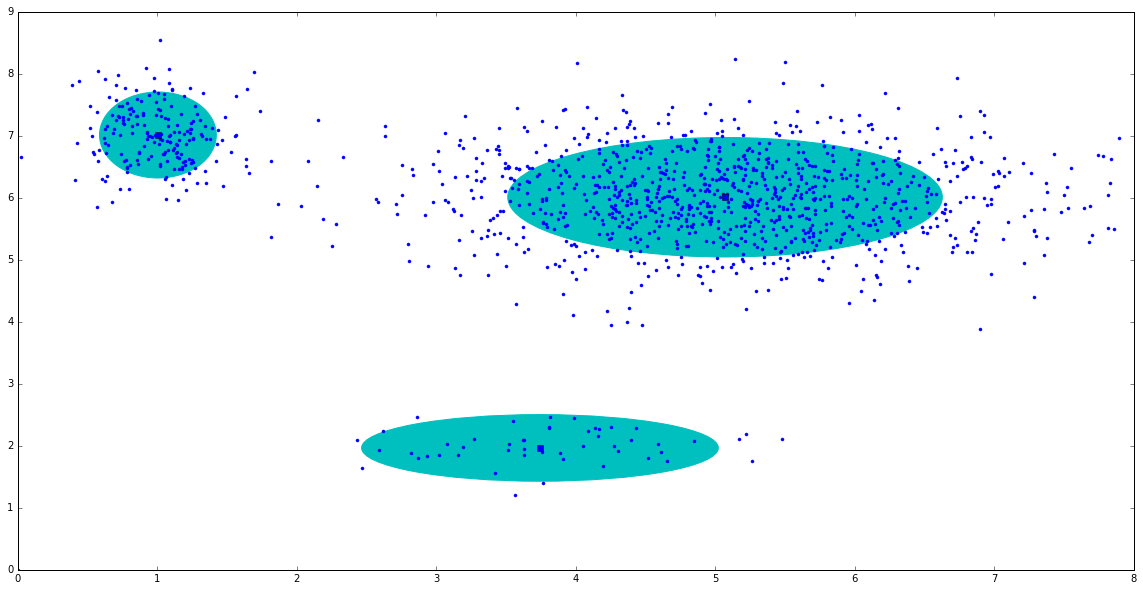

In [15]:
# Visualize the test data
fig0, ax0 = plt.subplots(figsize=(20,10))

ax0.plot(xpts, ypts, '.')
    
for i in range(gmm.n_components):
    mean = gmm.means_[i]
    covar = [[gmm.covars_[i][0],0],[0,gmm.covars_[i][1]]]
    v,w = linalg.eig(covar)
    v = 2.* np.sqrt(2.)*np.sqrt(v)
    u = w[0]/linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ax0.plot(gmm.means_[i][0],gmm.means_[i][1],'bs')
    #ax0.add_artist(Ellipse(mean,2*v[0],2*v[1],180.+angle,color='m'))   
    ax0.add_artist(Ellipse(mean,v[0],v[1],180.+angle,color='c'))   


In [16]:
gmm.predict_proba(all_data).shape

(1251, 3)

In [17]:
cluster_membership = np.argmax(gmm.predict_proba(all_data).T, axis=0)
cluster_membership.shape

(1251,)

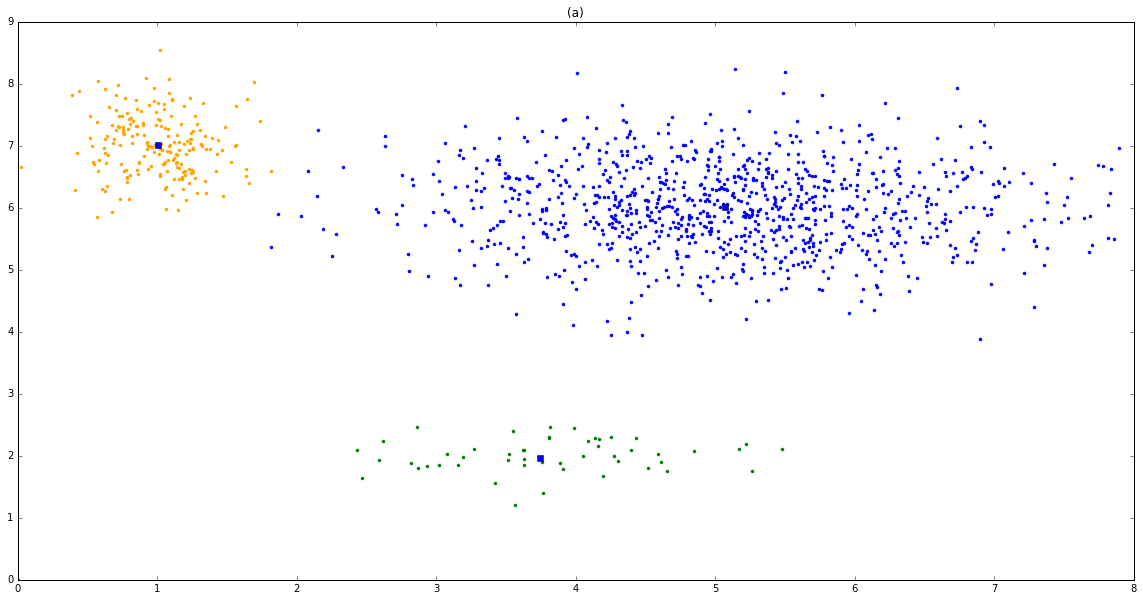

In [21]:
# Visualize the test data
fig0, ax0 = plt.subplots(figsize=(20,10))

for i in range(3):
    ax0.plot(xpts[cluster_membership==i], ypts[cluster_membership==i], '.',color=colors[i])
    
for i in range(gmm.n_components):
    mean = gmm.means_[i]
    covar = [[gmm.covars_[i][0],0],[0,gmm.covars_[i][1]]]
    v,w = linalg.eig(covar)
    v = 2.* np.sqrt(2.)*np.sqrt(v)
    u = w[0]/linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ax0.plot(gmm.means_[i][0],gmm.means_[i][1],'bs')
    ax0.set_title('(a)')
    #ax0.add_artist(Ellipse(mean,2*v[0],2*v[1],180.+angle,color='m'))   
    #ax0.add_artist(Ellipse(mean,v[0],v[1],180.+angle,color='c'))   

In [11]:
cluster_membership

array([1, 1, 1, ..., 0, 0, 0])